<a href="https://colab.research.google.com/github/Nithish1010/Youtube_Transcript_Summarizer/blob/main/YTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 12.6 MB/s eta 0:00:00


In [1]:
!pip install -q youtube_transcript_api

In [4]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

In [5]:

from youtube_transcript_api import YouTubeTranscriptApi
youtube_video_url = input("Please enter a YouTube video URL: ")
video_id = youtube_video_url.split("=")[1]
transcript = YouTubeTranscriptApi.get_transcript(video_id)
for segment in transcript:
    print(f"{segment['start']} - {segment['start'] + segment['duration']}: {segment['text']}")


Please enter a YouTube video URL: https://www.youtube.com/watch?v=awhqnSskWjU
1.76 - 5.68: hello everyone
3.439 - 8.86: this is george from invensis learning
5.68 - 12.08: welcome to our youtube channel
8.86 - 12.08: [Music]
12.88 - 17.119: i am sure you guys might have heard of
14.4 - 18.8: cyber security in today's session we are
17.119 - 20.56: going to have a brief tutorial about
18.8 - 22.880000000000003: cyber security threats
20.56 - 24.96: so without any further delay let's get
22.88 - 26.64: started we will begin this session by
24.96 - 28.080000000000002: discussing a little about what are cyber
26.64 - 29.92: security threats
28.08 - 32.239: next we will move further on to the
29.92 - 33.92: types of cybersecurity threats and
32.239 - 35.279999999999994: finally we will end this session by
33.92 - 37.52: discussing the ways to prevent
35.28 - 39.04: cybersecurity threats i hope the agenda
37.52 - 40.879000000000005: is clear to you guys
39.04 - 42.48: we will now begin the p

In [6]:
video_id

'awhqnSskWjU'

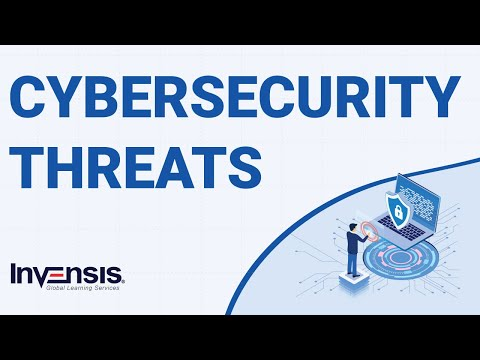

In [7]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [8]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript=YouTubeTranscriptApi.get_transcript(video_id)

In [9]:
transcript[0:5]

[{'text': 'hello everyone', 'start': 1.76, 'duration': 3.92},
 {'text': 'this is george from invensis learning',
  'start': 3.439,
  'duration': 5.421},
 {'text': 'welcome to our youtube channel', 'start': 5.68, 'duration': 6.4},
 {'text': '[Music]', 'start': 8.86, 'duration': 3.22},
 {'text': 'i am sure you guys might have heard of',
  'start': 12.88,
  'duration': 4.239}]

In [10]:
result=""
for i in transcript:
    result += '' +i['text']
print(len(result))

11880


In [11]:
summarizer = pipeline("summarization")


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [12]:
num_iters=int(len(result)/1000)
summarized_text=[]
for i in range(0,num_iters+1):
  start=0
  start=i*1000
  end=(i+1)*1000
  out=summarizer(result[start:end])
  out=out[0]
  out=out['summary_text']
  summarized_text.append(out)

In [13]:
print(summarized_text)

[' Almost 59 of the global population is using the internet on oneor the other electronic devicestest . Almost 59 per cent of the world population uses the internet . Cybersecurity is the set of practices used to protect computers computers and mobile devices . We will begin this session bydiscussing the types of cybersecurity threats .', ' A cyber threat is an offensive action taken by a hacker or unauthorizedindividual or a group of individuals . The first type of cyber attack is called fishingphishing . The attackers try to get access to personal information like login credentials debitor credit card details by pretendingthemselves as concerned confidentauthorities .', ' In a ransomware attack the user is compelled to remove all of their data and information from their system if they fail to meet the timeline and paying a ransom declared by cybercriminals . In spite of all this there isno guarantee as to whether paying theransom would secure their data or not .', ' Malware malware s

In [14]:
len(str(summarized_text))

4020

In [15]:
str(summarized_text)

'[\' Almost 59 of the global population is using the internet on oneor the other electronic devicestest . Almost 59 per cent of the world population uses the internet . Cybersecurity is the set of practices used to protect computers computers and mobile devices . We will begin this session bydiscussing the types of cybersecurity threats .\', \' A cyber threat is an offensive action taken by a hacker or unauthorizedindividual or a group of individuals . The first type of cyber attack is called fishingphishing . The attackers try to get access to personal information like login credentials debitor credit card details by pretendingthemselves as concerned confidentauthorities .\', \' In a ransomware attack the user is compelled to remove all of their data and information from their system if they fail to meet the timeline and paying a ransom declared by cybercriminals . In spite of all this there isno guarantee as to whether paying theransom would secure their data or not .\', \' Malware m